In [12]:
#Self Organizing Maps

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sys
import sompy
from time import time
from sompy.visualization.bmuhits import BmuHitsView

np.set_printoptions(threshold=sys.maxsize) #see all elements, dont truncate

In [13]:
dFrame = pd.read_csv('somDatasetLLM.csv')
quakeLLMRecArr  = dFrame.to_records(index=False)
quakeLLM = np.array(quakeLLMRecArr.tolist())

In [14]:
#train SOM

mapsize = [6,6] #define map size
sixSixSom = som.SOMFactory.build(quakeLLM, 
                                 mapsize, 
                                 mask=None, 
                                 mapshape='planar', 
                                 lattice='rect', 
                                 normalization='var', 
                                 initialization='pca', 
                                 neighborhood='gaussian', 
                                 training='batch', 
                                 name='sompy') 

# this will use the default parameters, but I can change the initialization and neighborhood methods

sixSixSom.train(n_job=1, 
                shared_memory = 'no', 
                verbose='debug')  # verbose='debug' will print more,
                            # verbose=None wont print anything

NameError: name 'som' is not defined

In [97]:
v = sompy.mapview.View2DPacked(6, 6, 'Visualization',text_size=12) 
v

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


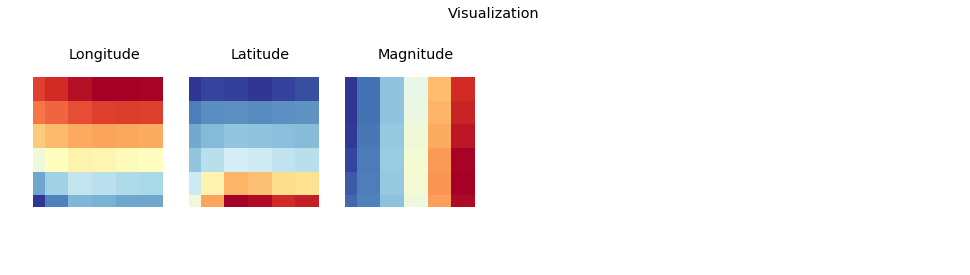

In [111]:
sixSixSom.component_names = ['Longitude','Latitude','Magnitude']
v.show(sixSixSom, what='codebook', which_dim='all', cmap=None, col_sz=6) #which_dim='all' default


update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


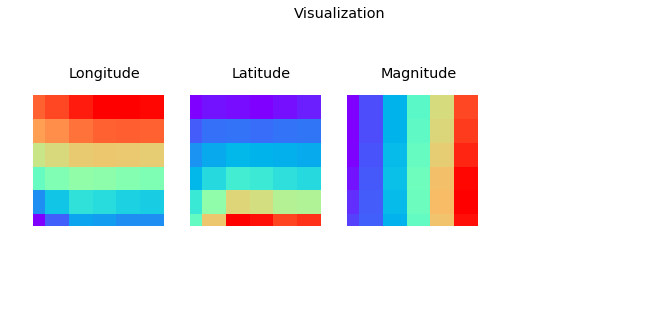

In [110]:
#jet colour
sixSixSom.component_names = ['Longitude','Latitude','Magnitude']
v.show(sixSixSom, what='codebook', which_dim='all', cmap='rainbow', col_sz=4) #which_dim='all' default

In [100]:
vis2 = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = sixSixSom.cluster(n_clusters=4) #this is cluster labels
# print cl
getattr(sixSixSom, 'cluster_labels')

array([3, 3, 0, 0, 1, 1, 3, 3, 0, 0, 1, 1, 3, 3, 0, 0, 1, 1, 3, 3, 0, 0,
       1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1])

C:\Users\afiqAUT\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
update_title_pos
update_title_pos
update_title_pos
update_title_pos


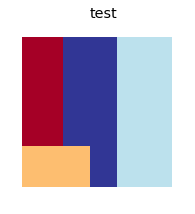

In [101]:
vis2.show(sixSixSom, what='cluster')

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


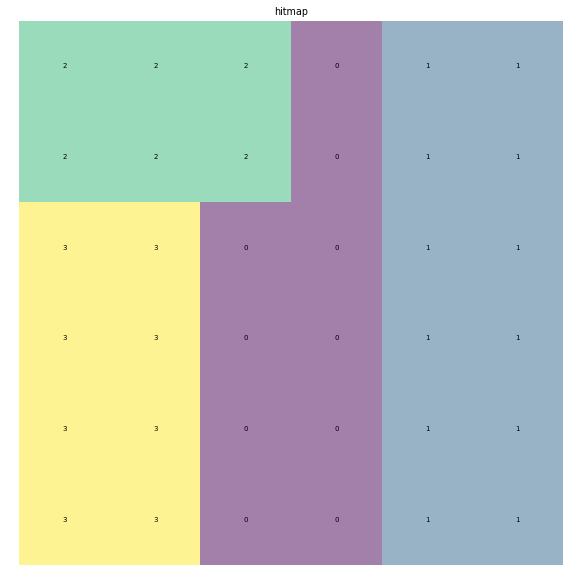

In [102]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=10, show_text=True)
h.show(sixSixSom)

In [103]:
sixSixSom.project_data(quakeLLM) # we can project each data point to a neuron

array([29, 23, 11, 23, 35, 29, 23, 23,  5,  5, 23, 11, 23, 23, 17, 23, 23,
        5, 35, 17, 35, 23, 29, 17, 23,  5, 23, 11, 29, 17, 17, 23, 17, 23,
       17, 23, 23, 11, 23, 11,  5, 35, 23, 17, 17, 29,  5, 35, 11, 35,  5,
       16,  5,  5, 17, 23, 23, 29, 29, 23, 16, 29, 35, 17, 29,  5,  5, 16,
       23, 17, 29, 29, 35, 11, 35, 29, 17, 23, 35, 17, 29, 29, 23, 17, 35,
       17, 23, 23, 22, 35, 10, 23, 29, 35, 35, 34, 17, 11,  5, 16, 11, 11,
       22, 29, 23, 29, 29, 22, 33, 34, 23, 35, 35,  5,  5,  5, 10, 34, 21,
       10, 22, 35, 29,  4, 34, 10, 16, 10, 28, 20, 28, 15, 11, 28,  4, 15,
       29, 35, 23, 20,  5, 17, 15, 22, 10, 21, 18, 34, 29, 15, 21, 18, 19,
       26, 16, 30, 30,  9, 11,  4, 30,  4, 10, 33,  4, 27, 21, 11, 22, 16,
       22, 11, 29, 23, 23, 17, 35, 21,  5, 35, 34, 23, 23,  4, 22, 21,  2,
       20, 32, 29,  5, 21, 34, 16, 25,  8, 15, 34, 13, 30, 22, 22, 24, 17,
       15, 10, 28, 16,  9,  4,  3, 21, 17, 15, 28, 15, 26, 21, 14, 21, 14,
        9, 27, 29,  0, 24

In [104]:
sixSixSom.codebook.matrix

array([[ 7.242100e-01, -5.780770e-01, -8.617260e-01],
       [ 8.132060e-01, -5.326790e-01, -6.352900e-01],
       [ 9.456360e-01, -5.464540e-01, -2.832570e-01],
       [ 1.035011e+00, -5.755460e-01,  1.272790e-01],
       [ 1.039114e+00, -5.388900e-01,  6.841770e-01],
       [ 1.019706e+00, -5.032890e-01,  1.241985e+00],
       [ 5.011700e-01, -3.659910e-01, -8.683730e-01],
       [ 5.707870e-01, -3.226730e-01, -6.365480e-01],
       [ 6.643270e-01, -3.143350e-01, -2.814000e-01],
       [ 7.240220e-01, -3.259990e-01,  1.411690e-01],
       [ 7.343420e-01, -3.125390e-01,  7.115320e-01],
       [ 7.286230e-01, -3.073630e-01,  1.278081e+00],
       [ 1.599320e-01, -2.277000e-01, -8.527760e-01],
       [ 2.355130e-01, -1.661740e-01, -6.225330e-01],
       [ 3.063100e-01, -1.291410e-01, -2.588380e-01],
       [ 3.263960e-01, -1.311860e-01,  1.766830e-01],
       [ 3.180660e-01, -1.440170e-01,  7.583670e-01],
       [ 3.054160e-01, -1.637610e-01,  1.338859e+00],
       [-3.155220e-01, -1.27

In [105]:
len(sixSixSom.codebook.matrix) #this is the map itself

36

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


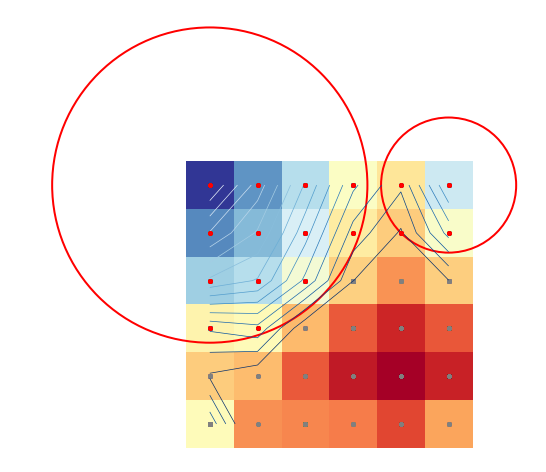

In [108]:
u = sompy.umatrix.UMatrixView(12, 
                              12, 
                              'umatrix', 
                              show_axis=True, 
                              text_size=8, 
                              show_text=True) #prep the plot

#This is the Umat value
UMAT  = u.build_u_matrix(sixSixSom, 
                         distance=1,  
                         row_normalized=False) #build the plot

#Here you have Umatrix plus its render
UMAT = u.show(sixSixSom, 
              distance2=1, 
              row_normalized=False,
              show_data=True, 
              contooor=True, 
              blob=True)

update_title_pos
update_title_pos
update_title_pos
update_title_pos


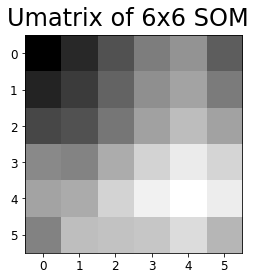

In [119]:
greyMat = UMAT[1]
plt.imshow(greyMat, cmap="gray")
plt.suptitle('Umatrix of 6x6 SOM', fontsize=24)
plt.show()

In [ ]:
#1 cluster

In [113]:
vis2 = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = sixSixSom.cluster(n_clusters=1) #this is cluster labels
# print cl
getattr(sixSixSom, 'cluster_labels')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [116]:
map_labels = sixSixSom.cluster(n_clusters=1)
data_labels = np.array([map_labels[int(k)] for k in sixSixSom._bmu[0]]) # mapping labels from grid to original data


In [117]:
map_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [118]:
data_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1]:
#now do for longitude latitude depth

In [6]:
dFrame = pd.read_csv('somDatasetLLD.csv')
quakeLLMRecArr  = dFrame.to_records(index=False)
quakeLLD = np.array(quakeLLMRecArr.tolist())

In [16]:
mapsize = [6,6] #define map size
sixSixDSom = sompy.SOMFactory.build(quakeLLD, 
                                 mapsize, 
                                 mask=None, 
                                 mapshape='planar', 
                                 lattice='rect', 
                                 normalization='var', 
                                 initialization='pca', 
                                 neighborhood='gaussian', 
                                 training='batch', 
                                 name='sompy') 

# this will use the default parameters, but I can change the initialization and neighborhood methods

sixSixDSom.train(n_job=1, 
                shared_memory = 'no', 
                verbose='debug')  # verbose='debug' will print more,
                            # verbose=None wont print anything

 Training...
--------------------------------------------------------------
 details: 
      > data len is 3290 and data dimension is 3
      > map size is 6,6
      > array size in log10 scale is 5.550619653436924
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 1

 find_bmu took: 0.116000 seconds
 update_codebook_voronoi took: 0.000000 seconds
 epoch: 1 ---> elapsed time:  0.116000, quantization error: 0.796184

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 1

 find_bmu took: 0.111000 seconds
 update_codebook_voronoi took: 0.000000 seconds
 epoch: 1 ---> elapsed time:  0.111000, quantization error: 0.561950

 --------------------------------------------------------------
 Final quantization error: 0.561950
 train took: 0.272000 seconds


findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\afiqAUT\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


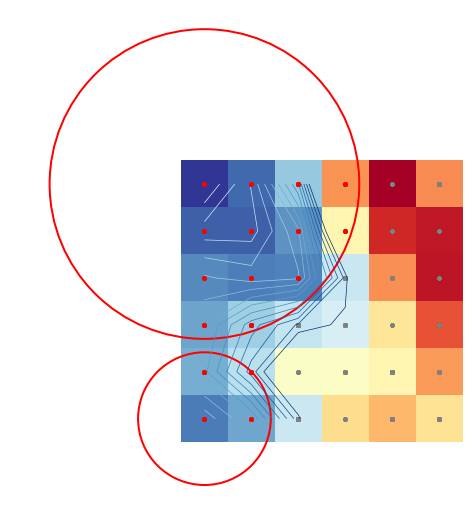

In [17]:
u = sompy.umatrix.UMatrixView(12, 
                              12, 
                              'umatrix', 
                              show_axis=True, 
                              text_size=8, 
                              show_text=True) #prep the plot

#This is the Umat value
UMAT  = u.build_u_matrix(sixSixDSom, 
                         distance=1,  
                         row_normalized=False) #build the plot

#Here you have Umatrix plus its render
UMAT = u.show(sixSixDSom, 
              distance2=1, 
              row_normalized=False,
              show_data=True, 
              contooor=True, 
              blob=True)

update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=24.0 to DejaVu Sans ('C:\\Users\\afiqAUT\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos


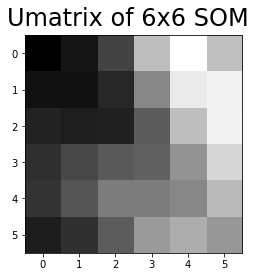

In [18]:
greyMat = UMAT[1]
plt.imshow(greyMat, cmap="gray")
plt.suptitle('Umatrix of 6x6 SOM', fontsize=24)
plt.show()

# k = 2

In [21]:
vis2 = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = sixSixDSom.cluster(n_clusters=2) #this is cluster labels
# print cl
getattr(sixSixDSom, 'cluster_labels')

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
map_labels = sixSixDSom.cluster(n_clusters=2)
data_labels = np.array([map_labels[int(k)] for k in sixSixDSom._bmu[0]]) # mapping labels from grid to original data

In [25]:
map_labels

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
data_labels

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [27]:
len(data_labels)

3290